# Exercise 1

In exercise 1, I design a function like a filter and the function can be used into many types of kernel


First, I load the image.

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
img=np.array(Image.open('kobe.jpg'))  # I change the image into matrix
plt.figure("a")
plt.imshow(img)
plt.axis('off')
plt.show()

## **Here are the functions in the exercise:**

The first function named creatkernel, I use this function to create kernel and use the kernel to convolve with the image.  
This function is for any filter can be got from a verctor.  
This function only need to input a row vector of the kernel, and function will output the hole kernel.  
The formula of the function: $K=v*v^T$ **v** is the input.

In [2]:
def creatkernel(k):
    k_sum=0
    k_len=len(k)
    k.shape=(k_len,1)
    kernel_original=np.dot(k,np.transpose(k))
    k_len2=len(kernel_original)
    for i in range (k_len2):
        for j in range (k_len2):
            k_sum=k_sum+kernel_original[i,j]
    kernel=kernel_original/k_sum
    return kernel,k_len2 

The second function named creatimage is creating a new image that bigger than original imgage.  
The purpose that I design this function is processing the boundary of the original picture.  
In this function, I add rows to the top and bottom of the original image, and add columns to the left and right of the original image.  
And the pixel of added rows and columns are zeros, because I don't want to add more other pixel into the convolution. I only want to keep the pixels of original image.  
The number of rows and columns will depend on the size of kernel.  
For example: if the size of a kernel is 3x3, the image needs to add 2 rows on the top of original image and the bottom of original image. Also, image needs to add 2 columns of the left and right of the original image.  
I call the output b-image.

In [3]:
def creatimage(img,kernel):#this function is to creat a new image in order to calculate better
    [a,b,c]=np.shape(img)
    kernel_length=len(kernel)
    length=int(kernel_length-1)
    length_1=int(length/2)
    img1=np.zeros([a+length,b+length,c], dtype=None, order='C')
    [z,x,y]=np.shape(img1)
    for i in range(a):
        for j in range(b):
            for k in range(c):
                img1[i+length_1,j+length_1,k]=img[i,j,k]
    return img1,length,length_1

**Here is the most important function in this exerciese**  
The function named handfilter is the function I use to blur image.  
In this function, I let kernel convolve with the image and get the new pixel.  
Because the image I use to convolve in this function is the image that was added rows and columns before.So the beginning point is the top left corner of the original.  
The main formula I use in this function is convolution.
For example: a 3x3 area of image convolve with kernel:  
  
$R=\left[\begin{matrix} R1 & R2 & R3 \\R4 & R5 & R6 \\R7 & R8 & R9\end{matrix}\right]$
$G=\left[\begin{matrix} G1 & G2 & G3 \\G4 & G5 & G6 \\G7 & G8 & G9\end{matrix}\right]$  
  
R5(the pixel of new image)=R1G1 + R2G2 + R3G3 + R4G4 + R5G5 + R6G6 + R7G7 + R8G8 + R9G9

In [24]:
def handfilter(kernel,img1,length,length_1): # this is the filter by hand 
    kernel_length=len(kernel)
    [a,b,c]=np.shape(img1)
    img_out=np.zeros([a-length,b-length,c], dtype=None, order='C')
    [x,y,z]=np.shape(img_out)
    for i in range(x):
        for j in range(y):
            for l in range(z):
                temp=0
                for ii in range (kernel_length):
                    for jj in range (kernel_length):
                        temp=temp+img1[i+ii,j+jj,l]*kernel[ii,jj]
                img_out[i,j,l]=temp        
    return img_out   

### Now I will compare the results with 3 different input:  
The three inputs incldues the size of kernel and the value of the kernel.
Because I design a function named creatkernel, so I do not need to input the hole kernel. I only need to input a row of the kernel.

In [5]:
k1=np.array([1,2,1])    
k2=np.array([1,1,1,1,1]) 
k3=np.array([1,4,6,4,1]) 

### Then use the creatkernel function to get the kernels

In [6]:
kernel1,k_len1=creatkernel(k1)
kernel2,k_len2=creatkernel(k2)
kernel3,k_len3=creatkernel(k3)

### Creat the b-image of original image with different kernel

In [7]:
img1,length1,length_1=creatimage(img,kernel1) 
img2,length2,length_2=creatimage(img,kernel2) 
img3,length3,length_3=creatimage(img,kernel3)

### Use the function to filte the original image.

In [8]:
imgf1=handfilter(kernel1,img1,length1,length_1)
imgf2=handfilter(kernel2,img2,length2,length_2)
imgf3=handfilter(kernel3,img3,length3,length_3)

### Get new image

In [9]:
new_img1=Image.fromarray(imgf1.astype(np.uint8))
new_img2=Image.fromarray(imgf2.astype(np.uint8))
new_img3=Image.fromarray(imgf3.astype(np.uint8))

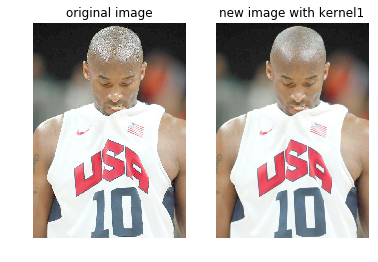

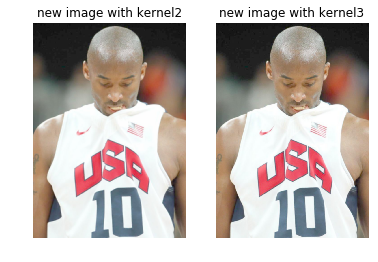

In [10]:
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('new image with kernel1')
plt.imshow(new_img1)
plt.axis('off')
plt.figure()
plt.subplot(1,2,1)
plt.title('new image with kernel2')
plt.imshow(new_img2)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('new image with kernel3')
plt.imshow(new_img3)
plt.axis('off')

plt.show()

Obviously, three kernels all blurs the original image.
Compare with four images, I use the sweat as a standard.  
For kernel1, we can still see the sweat on the head.  
For kernel3, the sweat become not so clear.  
For kernel2, we cannot see the sweat and the hole image is blurred obviously.

## Gaussian kernel

Now I will use gaussian kernel to blur the image.  
In image processing, we often use gaussian blurring to remove some noisy.  
I will use gaussian kernel and the handfilter function to achieve the gaussian blurring.  
The gaussian kernel: $G(x,y) = \dfrac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{x^2 + y^2}{2 \sigma^2}} $  
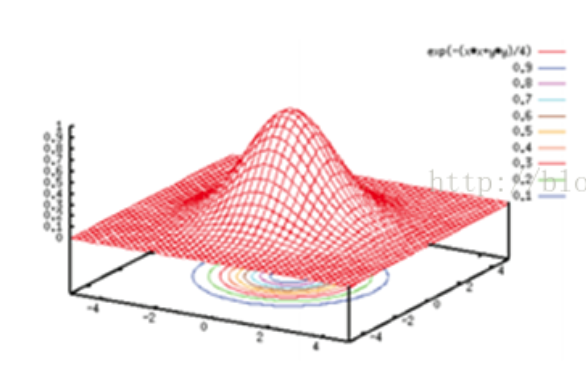
According to the formula, we can find that there is a parameter need to input, $\sigma$ and we also need to input the size of the kernel, because we have to creat the b-image of the kernel.

In [11]:
sigma=input("sigma：")
sigma=int(sigma)
kernel_size=input("kernel size:")
kernel_size=int(kernel_size)

sigma：8
kernel size:5


Then I use the formula to create gaussian kernel.

In [12]:
def gaussian_kernel(kernel_size,sigma):   
    kernel = np.zeros([kernel_size,kernel_size])
    center = int(kernel_size/2)
    s = 2*(sigma**2)*np.pi
    sum_val = 0
    for i in range(0,kernel_size):
        for j in range(0,kernel_size):
            x = i-center
            y = j-center
            kernel[i,j] = np.exp(-(x**2+y**2)/s)
            sum_val=sum_val+kernel[i,j]
    sum_val=1/sum_val
    gaussk=kernel*sum_val
    return gaussk

In [13]:
gaussk=gaussian_kernel(kernel_size,sigma)

Then do the same step of kerner1, kernel2 and kernel3.

In [14]:
imgg,lengthg,length_g=creatimage(img,gaussk)
imgfg=handfilter(gaussk,imgg,lengthg,length_g)

In [15]:
new_imgg = Image.fromarray(imgfg.astype(np.uint8))

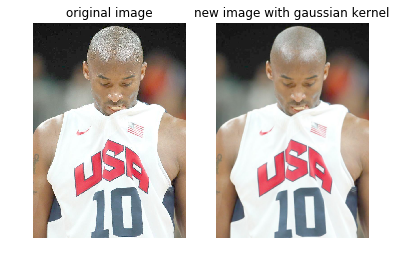

In [16]:
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('new image with gaussian kernel')
plt.imshow(new_imgg)
plt.axis('off')
new_imgg.show()

According to the results, I find that the using gaussian kernel blurs makes image more blurry than kernerl1, kernel2 and kernel3.

## What about adding noisy?

Now I use these code to add 5000 noisy point into the original image.

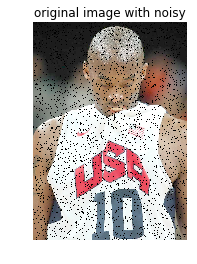

In [17]:
img_n=np.array(Image.open('kobe.jpg'))  # I change the image into matrix
rows,cols,dims=img.shape
for i in range(50000):
    x=np.random.randint(0,rows)
    y=np.random.randint(0,cols)
    img_n[x,y,:]=0

plt.figure()    
plt.title('original image with noisy')
plt.imshow(img_n)
plt.axis('off')
plt.show()

Repeat the steps of blurring the original image.

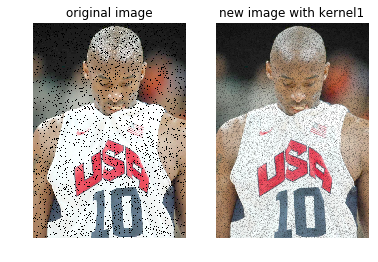

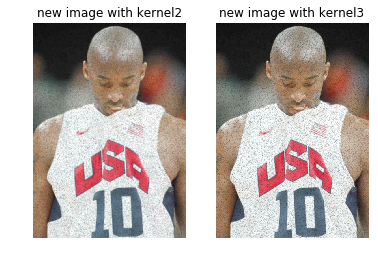

In [18]:
img_n1,length_n1,length_n_1=creatimage(img_n,kernel1) 
img_n2,length_n2,length_n_2=creatimage(img_n,kernel2) 
img_n3,length_n3,length_n_3=creatimage(img_n,kernel3)

img_nf1=handfilter(kernel1,img_n1,length_n1,length_n_1)
img_nf2=handfilter(kernel2,img_n2,length_n2,length_n_2)
img_nf3=handfilter(kernel3,img_n3,length_n3,length_n_3)

new_img_n1=Image.fromarray(img_nf1.astype(np.uint8))
new_img_n2=Image.fromarray(img_nf2.astype(np.uint8))
new_img_n3=Image.fromarray(img_nf3.astype(np.uint8))

plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img_n)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('new image with kernel1')
plt.imshow(new_img_n1)
plt.axis('off')
plt.figure()
plt.subplot(1,2,1)
plt.title('new image with kernel2')
plt.imshow(new_img_n2)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('new image with kernel3')
plt.imshow(new_img_n3)
plt.axis('off')

plt.show()

According to the results, we can see that the kernel2 has the best performance of blurring the original image after adding noisy.   
  
Now I will show the performance of gaussian kernel.  

sigma：8
kernel size:7


(-0.5, 682.5, 965.5, -0.5)

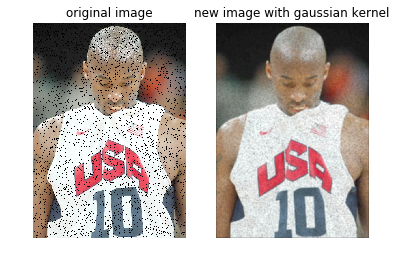

In [19]:
sigma_n=input("sigma：")
sigma_n=int(sigma_n)
kernel_size_n=input("kernel size:")
kernel_size_n=int(kernel_size_n)

gaussk_n=gaussian_kernel(kernel_size_n,sigma_n)

imgg_n,lengthg_n,length_g_n=creatimage(img_n,gaussk_n)
imgfg_n=handfilter(gaussk_n,imgg_n,lengthg_n,length_g_n)

new_imgg_n = Image.fromarray(imgfg_n.astype(np.uint8))

plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img_n)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('new image with gaussian kernel')
plt.imshow(new_imgg_n)
plt.axis('off')

Obviously, the results of using gaussian is better.

## Implement: Blur centeral area

I will blur the centeral area of the image.  
The size of central area will be 100x100.  
The kernel I use is gaussian kernel

Select the central area:

In [20]:
[row,column,channel]=np.shape(img)
cen_row=int(row/2)
cen_column=int(column/2)

In [21]:
sigma_c=input("sigma：")
sigma_c=int(sigma_c)
kernel_size_c=input("kernel size:")
kernel_size_c=int(kernel_size_c)

gaussk_c=gaussian_kernel(kernel_size_c,sigma_c)

imgc,lengthc,length_c=creatimage(img,gaussk_c)

def handfilter_center(kernel,img1,length,length_1,cen_row,cen_column):
    kernel_length=len(kernel)
    [a,b,c]=np.shape(img1)
    img_out=np.zeros([a-length,b-length,c], dtype=None, order='C')
    [x,y,z]=np.shape(img_out)
    for i in range(x):
        for j in range(y):
            for l in range(z):
                if i>=cen_row-100 and i<=cen_row+100 and j>=cen_column-100 and j<=cen_column+100:
                    temp=0
                    for ii in range (kernel_length):
                        for jj in range (kernel_length):
                            temp=temp+img1[i+ii,j+jj,l]*kernel[ii,jj]
                            img_out[i,j,l]=temp
                else: 
                    img_out[i,j,l]=img1[i+length_1,j+length_1,l]
    return img_out   

imgfc=handfilter_center(gaussk_c,imgc,lengthc,length_c,cen_row,cen_column)

new_imc = Image.fromarray(imgfc.astype(np.uint8))

sigma：7
kernel size:5


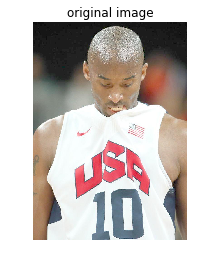

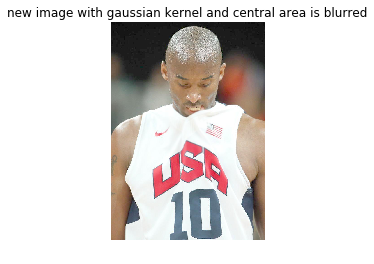

In [22]:
plt.title('original image')
plt.imshow(img)
plt.axis('off')
plt.figure()
plt.title('new image with gaussian kernel and central area is blurred')
plt.axis('off')
plt.imshow(new_imc)

You can see that, only central area is blurred.  
The sweat on the head are not blurred.

Now I input an interesting kernel and I want to know what new image is.

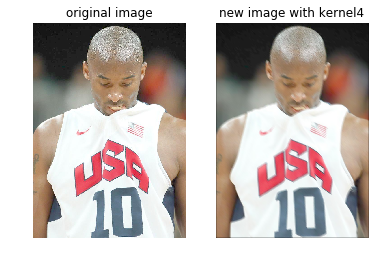

In [23]:
kernel4=np.array([[1/9,0,0,0,0,0,0,0,0],
                  [0,1/9,0,0,0,0,0,0,0],
                  [0,0,1/9,0,0,0,0,0,0],
                  [0,0,0,1/9,0,0,0,0,0],
                  [0,0,0,0,1/9,0,0,0,0],
                  [0,0,0,0,0,1/9,0,0,0],
                  [0,0,0,0,0,0,1/9,0,0],
                  [0,0,0,0,0,0,0,1/9,0],
                  [0,0,0,0,0,0,0,0,1/9]])
                  
img4,length4,length_4= creatimage(img,kernel4) 
imgf4=handfilter(kernel4,img4,length4,length_4)
new_img4=Image.fromarray(imgf4.astype(np.uint8))

plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('new image with kernel4')
plt.imshow(new_img4)
plt.axis('off')
new_imgg.show()

The new image looks like the original move from left bottom corner to right top corner.